In [10]:
import numpy as np
import ccdproc as cp
import matplotlib.pyplot as plt
import astropy.units as u
import scipy.signal as ss
import scipy.ndimage.filters as sf
from mxdrs.Recipes import cal_loc_one_mx as c

%matplotlib notebook

In [2]:
ccd = cp.fits_ccddata_reader('flat1.fits', unit=u.adu)

<IPython.core.display.Javascript object>


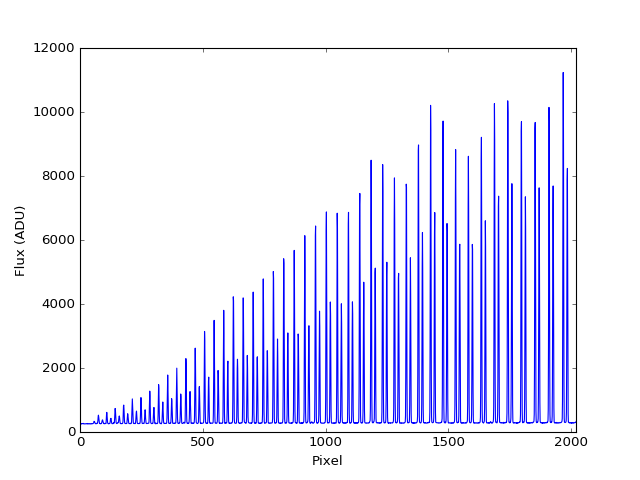

In [4]:
plt.plot(ccd.data[2019])
plt.xlim(0, 2019)
plt.ylabel('Flux (ADU)')
plt.xlabel('Pixel')
plt.show()

In [54]:
nccd = sf.median_filter(ccd.data, size=3)

<IPython.core.display.Javascript object>


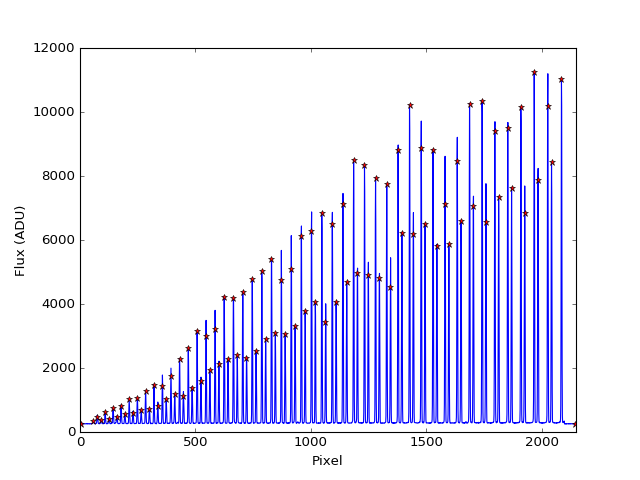

In [57]:
row = 2019
peakind = ss.find_peaks_cwt(nccd[row], widths=np.arange(1,15), min_snr=1.0)

plt.plot(ccd.data[row])

for pk in peakind:
    plt.plot(pk-1, ccd.data[row, pk-1], '*', color='r')
plt.xlim(0, 2148)
plt.ylabel('Flux (ADU)')
plt.xlabel('Pixel')
plt.show()

In [64]:
row_cut, peaks_in_row = c.cal_loc('list.lis',border_offset=100, hdu=0)

<IPython.core.display.Javascript object>


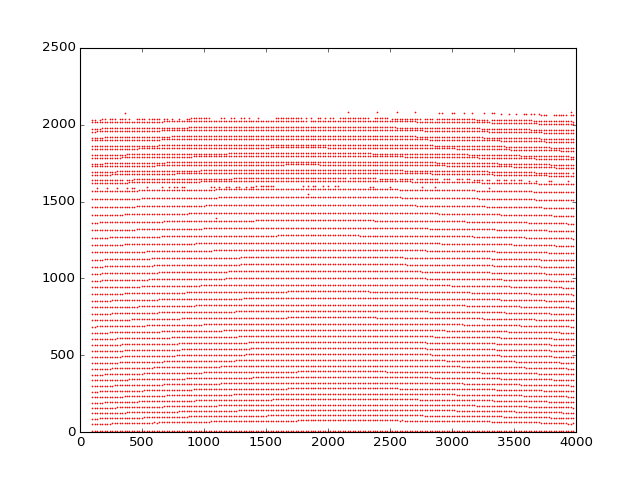

In [87]:
for k in range(54):
    for i in range(len(peaks_in_row[0])):
        plt.plot(row_cut[0][i], peaks_in_row[0][i][k], '.', color='r', markersize=2)

plt.show()